<a href="https://colab.research.google.com/github/puraminy/mini_proj2/blob/master/Hopfiled_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Accuracy of the network is 7.500000


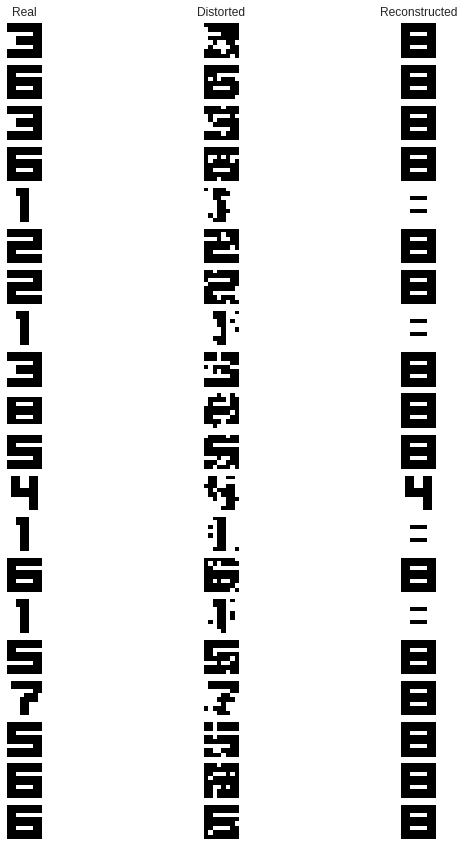

In [9]:
# -*- coding: utf-8 -*-
"""np_hnn_reconstruction.ipynb

Automatically generated by Colaboratory.

Original file is located at
    https://colab.research.google.com/github/puraminy/mini_proj2/blob/master/np_hnn_reconstruction.ipynb

# Hopfield Network
###### data reconstruction

Import dependencies
"""

import numpy as np
import matplotlib.pyplot as plt
# %matplotlib inline

def plot_images(images, title, no_i_x, no_i_y=3):
    fig = plt.figure(figsize=(10, 15))
    fig.canvas.set_window_title(title)
    images = np.array(images).reshape(-1, 8, 8)
    # images = np.pad(images, ((0, 0), (1, 1), (1, 1)), 'constant', constant_values=-1)
    for i in range(no_i_x):
        for j in range(no_i_y):
            ax = fig.add_subplot(no_i_x, no_i_y, no_i_x * j + (i + 1))
            ax.matshow(images[no_i_x * j + i], cmap="gray")
            plt.xticks(np.array([]))
            plt.yticks(np.array([]))

            if j == 0 and i == 0:
                ax.set_title("Real")
            elif j == 0 and i == 1:
                ax.set_title("Distorted")
            elif j == 0 and i == 2:
                ax.set_title("Reconstructed")

"""####  Dummy Data"""

perfect_data = {
    "1": [1, 1, 0,  0, 0,  1, 1, 1,
          1, 1, 0,  0, 0,  1, 1, 1,
          1, 1, 1,  0, 0,  1, 1, 1,
          1, 1, 1,  0, 0,  1, 1, 1,
          1, 1, 1,  0, 0,  1, 1, 1,
          1, 1, 1,  0, 0,  1, 1, 1,
          1, 1, 1,  0, 0,  1, 1, 1,
          1, 1, 1,  0, 0,  1, 1, 1],

    "2": [0, 0, 0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0, 0, 0,
          1, 1, 1, 1, 1, 1, 0, 0,
          0, 0, 0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0, 0, 0,
          0, 0, 1, 1, 1, 1, 1, 1,
          0, 0, 0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0, 0, 0],

    "3": [0, 0, 0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0, 0, 0,
          1, 1, 1, 1, 1, 1, 0, 0,
          1, 1, 0, 0, 0, 0, 0, 0,
          1, 1, 0, 0, 0, 0, 0, 0,
          1, 1, 1, 1, 1, 1, 0, 0,
          0, 0, 0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0, 0, 0],

    "4": [1, 0, 0, 1, 1, 0, 0, 1,
          1, 0, 0, 1, 1, 0, 0, 1,
          1, 0, 0, 1, 1, 0, 0, 1,
          1, 0, 0, 0, 0, 0, 0, 1,
          1, 0, 0, 0, 0, 0, 0, 1,
          1, 1, 1, 1, 1, 0, 0, 1,
          1, 1, 1, 1, 1, 0, 0, 1,
          1, 1, 1, 1, 1, 0, 0, 1],

    "5": [0, 0, 0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0, 0, 0,
          0, 0, 1, 1, 1, 1, 1, 1,
          0, 0, 0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0, 0, 0,
          1, 1, 1, 1, 1, 1, 0, 0,
          0, 0, 0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0, 0, 0],

    "6": [0, 0, 0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0, 0, 0,
          0, 0, 1, 1, 1, 1, 1, 1,
          0, 0, 0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0, 0, 0,
          0, 0, 1, 1, 1, 1, 0, 0,
          0, 0, 0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0, 0, 0],

    "7": [1, 0, 0, 0, 0, 0, 0, 0,
          1, 0, 0, 0, 0, 0, 0, 0,
          1, 1, 1, 1, 1, 1, 0, 0,
          1, 1, 1, 1, 0, 0, 0, 1,
          1, 1, 1, 0, 0, 0, 0, 1,
          1, 1, 1, 0, 0, 1, 1, 1,
          1, 1, 1, 0, 0, 1, 1, 1,
          1, 1, 1, 0, 0, 1, 1, 1],

    "8": [1, 1, 1, 1, 1, 1, 1, 1,
          0, 0, 0, 0, 0, 0, 0, 0,
          0, 0, 1, 1, 1, 1, 0, 0,
          0, 0, 0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0, 0, 0,
          0, 0, 1, 1, 1, 1, 0, 0,
          0, 0, 0, 0, 0, 0, 0, 0,
          1, 1, 1, 1, 1, 1, 1, 1],

    "9": [1, 0, 0, 0, 0, 0, 0, 0,
          1, 0, 0, 0, 0, 0, 0, 0,
          1, 0, 0, 1, 1, 1, 0, 0,
          1, 0, 0, 0, 0, 0, 0, 0,
          1, 0, 0, 0, 0, 0, 0, 0,
          1, 1, 1, 1, 1, 1, 1, 0,
          1, 1, 0, 0, 0, 0, 0, 0,
          1, 1, 0, 0, 0, 0, 0, 0],

    "0": [0, 0, 0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0, 0, 0,
          0, 0, 1, 1, 1, 1, 0, 0,
          0, 0, 1, 1, 1, 1, 0, 0,
          0, 0, 1, 1, 1, 1, 0, 0,
          0, 0, 1, 1, 1, 1, 0, 0,
          0, 0, 0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0, 0, 0],
}
for key,value in perfect_data.items():
    perfect_data[key]=[2*x-1 for x in value]
    

"""### Pre-Process Data

##### Data Parameters

Hopfield networks can hold about 0.138 \* n_neurons for better denoising <br>
0.138 \* n_neurons = 0.138 \* 64 = 8.85 ~ 8 <br>
"""

n_train = 8

n_test = 200

# no of images to show in output plot
n_train_disp = 20

# Amount of distortion (0 < distort < 1)
distort = 0.1

# Size of image(width)
n_side = 8

# No of neurons
n_neurons = n_side * n_side

train_data = [np.array(d) for d in perfect_data.values()][:n_train]

"""Generate test data by adding noise to train data"""

test_data = []
for d in range(n_test):
    r_i = np.random.randint(0, n_train)
    base_pattern = np.array(train_data[r_i])
    noise = 1 * (np.random.random(base_pattern.shape) > distort)
    np.place(noise, noise == 0, -1)
    noisy_pattern = np.multiply(base_pattern, noise)
    test_data.append((base_pattern, noisy_pattern))

"""### Neural Network

Function to train the network using Hebbian learning rule
"""

def train(neu, training_data):
    w = np.zeros([neu, neu])
    for data in training_data:
        w += np.outer(data, data)
    for diag in range(neu):
        w[diag][diag] = 0
    return w

"""Function to test the network"""

def test(weights, testing_data):
    success = 0.0

    output_data = []

    for data in testing_data:
        true_data = data[0]
        noisy_data = data[1]
        predicted_data = retrieve_pattern(weights, noisy_data)
        if np.array_equal(true_data, predicted_data):
            success += 1.0
        output_data.append([true_data, noisy_data, predicted_data])

    return (success / len(testing_data)), output_data

"""Function to retrieve individual noisy patterns"""

def retrieve_pattern(weights, data, steps=10):
    res = np.array(data)

    for _ in range(steps):
        for i in range(len(res)):
            raw_v = np.dot(weights[i], res)
            if raw_v > 0:
                res[i] = 1
            else:
                res[i] = -1
    return res

"""#### Train"""

W = train(n_neurons, train_data)

"""#### Test"""

accuracy, op_imgs = test(W, test_data)

"""Print accuracy"""

print("Accuracy of the network is %f" % (accuracy * 100))

"""#### Plot test result"""

plot_images(op_imgs, "Reconstructed Data", n_train_disp)
plt.show()